In [226]:
#Importing the library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [227]:
#Loading the dataset

ds_covid=pd.read_csv('covid-19.csv',parse_dates=['Date'])
ds_covid

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [228]:
#Seeing data from bottom five data
ds_covid.tail()

,Date,Country,Confirmed,Recovered,Deaths
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7
23687,2020-05-26,Zimbabwe,56,25,4


In [229]:
#Checking columns
ds_covid.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [230]:
#Checking shape
ds_covid.shape

(23688, 5)

In [231]:
#Checking datatype of columns
ds_covid.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [232]:
#Checking information
ds_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23688 non-null  datetime64[ns]
 1   Country    23688 non-null  object        
 2   Confirmed  23688 non-null  int64         
 3   Recovered  23688 non-null  int64         
 4   Deaths     23688 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 925.4+ KB


#### Adding New Column "Active_Cases"

In [233]:
#Adding new column

ds_covid['Cases']=ds_covid['Recovered']+ds_covid['Deaths']

In [234]:
#Adding new column Active_cases
ds_covid['Active_Cases']=ds_covid['Confirmed']-ds_covid['Cases']

In [235]:
#Seeing bottom five data
ds_covid.tail()

,Date,Country,Confirmed,Recovered,Deaths,Cases,Active_Cases
23683,2020-05-26,West Bank and Gaza,429,365,3,368,61
23684,2020-05-26,Western Sahara,9,6,1,7,2
23685,2020-05-26,Yemen,249,10,49,59,190
23686,2020-05-26,Zambia,920,336,7,343,577
23687,2020-05-26,Zimbabwe,56,25,4,29,27


In [236]:
#Dropping column Cases
ds_covid.drop(['Cases'],axis=1,inplace=True)
ds_covid

,Date,Country,Confirmed,Recovered,Deaths,Active_Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0
...,...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3,61
23684,2020-05-26,Western Sahara,9,6,1,2
23685,2020-05-26,Yemen,249,10,49,190
23686,2020-05-26,Zambia,920,336,7,577


In [237]:
ds_covid.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths', 'Active_Cases'], dtype='object')

### Checking Missing data

In [238]:
ds_covid.isnull().sum()

Date            0
Country         0
Confirmed       0
Recovered       0
Deaths          0
Active_Cases    0
dtype: int64

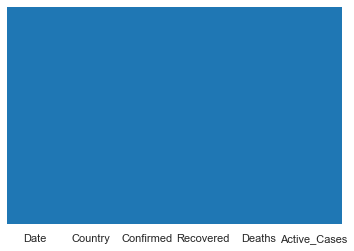

In [239]:
sns.heatmap(ds_covid.isnull(),yticklabels=False,cbar=False,cmap='tab10')

## Summary Statisrics

In [240]:
ds_covid.describe()

,Confirmed,Recovered,Deaths,Active_Cases
count,2.368800e+04,23688.000000,23688.000000,2.368800e+04
mean,7.969368e+03,2581.801714,526.935030,4.860631e+03
std,5.842109e+04,15143.101257,3992.815956,4.340165e+04
min,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,1.800000e+01,1.000000,0.000000,1.200000e+01
75%,7.300000e+02,123.000000,13.000000,4.302500e+02
max,1.680913e+06,384902.000000,98913.000000,1.197098e+06


In [241]:
ds_covid['Country'].value_counts()

Uzbekistan      126
South Africa    126
Brunei          126
Mozambique      126
Iran            126
               ... 
Italy           126
Bolivia         126
Estonia         126
Armenia         126
Algeria         126
Name: Country, Length: 188, dtype: int64

In [242]:
ds_covid['Date'].value_counts()

2020-04-09    188
2020-05-03    188
2020-02-08    188
2020-05-19    188
2020-01-26    188
             ... 
2020-03-26    188
2020-03-13    188
2020-02-29    188
2020-02-16    188
2020-03-27    188
Name: Date, Length: 126, dtype: int64

## Check Correlation

In [243]:
covid=ds_covid.corr()
covid

,Confirmed,Recovered,Deaths,Active_Cases
Confirmed,1.000000,0.810991,0.929718,0.977566
Recovered,0.810991,1.000000,0.778094,0.671152
Deaths,0.929718,0.778094,1.000000,0.887974
Active_Cases,0.977566,0.671152,0.887974,1.000000


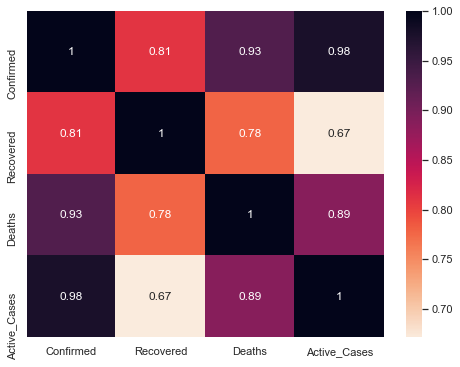

In [244]:
plt.figure(figsize=(8,6))
sns.heatmap(covid,annot=True,cmap='rocket_r')

In [245]:
#Checking unique countries
ds_covid['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [246]:
#from Date columns we can get monthly,daily,yearly column which can be help in data analysis

df_covid_cases=pd.DataFrame()
df_covid_cases['Month']=ds_covid['Date'].dt.month_name()
df_covid_cases['Year']=ds_covid['Date'].dt.year
df_covid_cases['Day']=ds_covid['Date'].dt.day_name()
df_covid_cases['Confirmed']=ds_covid['Confirmed']
df_covid_cases['Recovered']=ds_covid['Recovered']
df_covid_cases['Deaths']=ds_covid['Deaths']
df_covid_cases['Active_Cases']=ds_covid['Active_Cases']
df_covid_cases

,Month,Year,Day,Confirmed,Recovered,Deaths,Active_Cases
0,January,2020,Wednesday,0,0,0,0
1,January,2020,Wednesday,0,0,0,0
2,January,2020,Wednesday,0,0,0,0
3,January,2020,Wednesday,0,0,0,0
4,January,2020,Wednesday,0,0,0,0
...,...,...,...,...,...,...,...
23683,May,2020,Tuesday,429,365,3,61
23684,May,2020,Tuesday,9,6,1,2
23685,May,2020,Tuesday,249,10,49,190
23686,May,2020,Tuesday,920,336,7,577


In [247]:
#Making one more column which tell whether it is weekday or weekend

df_covid_cases['Type_of_day']=np.where((df_covid_cases['Day']=="Sunday")|
                                       (df_covid_cases['Day']=="Saturday"),
                                        "Weekend","Weekday")
df_covid_cases

,Month,Year,Day,Confirmed,Recovered,Deaths,Active_Cases,Type_of_day
0,January,2020,Wednesday,0,0,0,0,Weekday
1,January,2020,Wednesday,0,0,0,0,Weekday
2,January,2020,Wednesday,0,0,0,0,Weekday
3,January,2020,Wednesday,0,0,0,0,Weekday
4,January,2020,Wednesday,0,0,0,0,Weekday
...,...,...,...,...,...,...,...,...
23683,May,2020,Tuesday,429,365,3,61,Weekday
23684,May,2020,Tuesday,9,6,1,2,Weekday
23685,May,2020,Tuesday,249,10,49,190,Weekday
23686,May,2020,Tuesday,920,336,7,577,Weekday


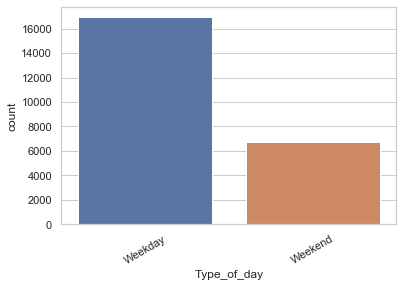

Weekday    16920
Weekend     6768
Name: Type_of_day, dtype: int64


In [249]:
#Lets make the countplot for avg count during weekend and weekdays

sns.countplot(x='Type_of_day',data=df_covid_cases)
plt.xticks(rotation=30)
plt.show()

print(df_covid_cases['Type_of_day'].value_counts())

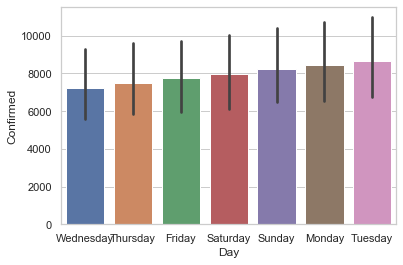

In [250]:
#Average count during days of week
sns.set(style='whitegrid')
plt.figure(figsize=(6,4))
sns.barplot(x='Day',y='Confirmed',data=df_covid_cases)

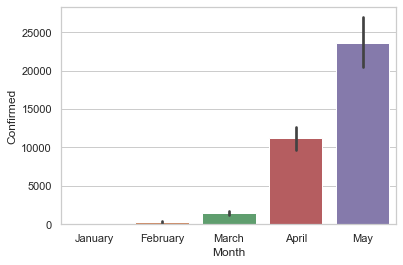

In [251]:
#Average count of Confirmed case during month of year

sns.barplot(x='Month',y='Confirmed',data=df_covid_cases)

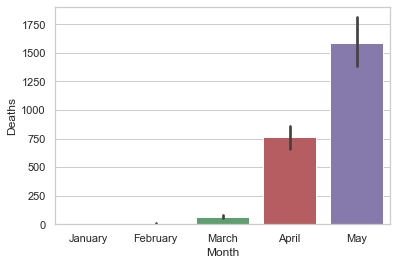

In [252]:
#Average count of Death during month of year

sns.barplot(x='Month',y='Deaths',data=df_covid_cases)

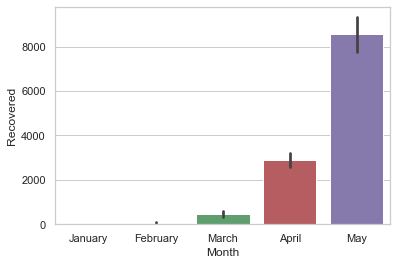

In [253]:
#Average count of Recovered case during month of year

sns.barplot(x='Month',y='Recovered',data=df_covid_cases)

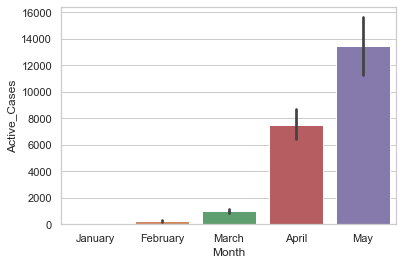

In [254]:
#Average count of Active_Cases during month of year

sns.barplot(x='Month',y='Active_Cases',data=df_covid_cases)

## Bivariate Analysis

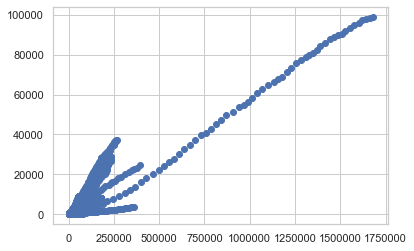

In [262]:
plt.scatter(ds_covid['Confirmed'],ds_covid['Deaths'])

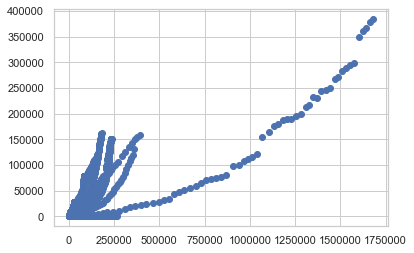

In [263]:
plt.scatter(ds_covid['Confirmed'],ds_covid['Recovered'])

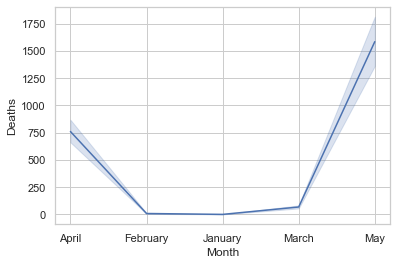

In [256]:
#Average count of deaths cases during month of year via line plot

sns.lineplot(x='Month',y='Deaths',data=df_covid_cases)

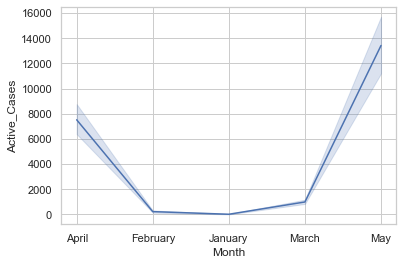

In [257]:
#Average count of Active cases during month of year via line plot

sns.lineplot(x='Month',y='Active_Cases',data=df_covid_cases)

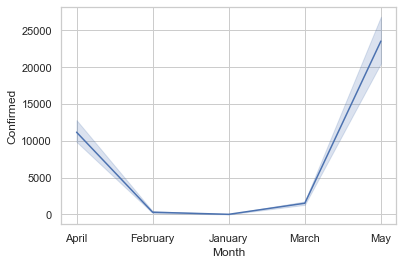

In [255]:
#Average count of Confirmed cases during month of year via line plot

sns.lineplot(x='Month',y='Confirmed',data=df_covid_cases)

In [258]:
#Checking the country where maximum confirmed cases are present

date=ds_covid[ds_covid['Date']==ds_covid['Date'].max()]
most_affected_country=date.groupby(by='Country')['Confirmed'].sum().sort_values(ascending=False).reset_index()
most_affected_country

,Country,Confirmed
0,US,1680913
1,Brazil,391222
2,Russia,362342
3,United Kingdom,266599
4,Spain,236259
...,...,...
183,Suriname,11
184,MS Zaandam,9
185,Western Sahara,9
186,Papua New Guinea,8


In [259]:
#Checking the country where maximum Active cases are present

date=ds_covid[ds_covid['Date']==ds_covid['Date'].max()]
most_affected_country=date.groupby(by='Country')['Active_Cases'].sum().sort_values(ascending=False).reset_index()
most_affected_country

,Country,Active_Cases
0,US,1197098
1,United Kingdom,228308
2,Russia,227406
3,Brazil,208117
4,France,88317
...,...,...
183,Papua New Guinea,0
184,Dominica,0
185,Belize,0
186,Trinidad and Tobago,0


In [260]:
#Checking the data of USA

US=ds_covid[ds_covid['Country']=='US']
US=US.groupby(by='Date')['Confirmed','Recovered','Deaths','Active_Cases'].sum().reset_index()
US

,Date,Confirmed,Recovered,Deaths,Active_Cases
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5
...,...,...,...,...,...
121,2020-05-22,1600937,350135,95979,1154823
122,2020-05-23,1622612,361239,97087,1164286
123,2020-05-24,1643246,366736,97720,1178790
124,2020-05-25,1662302,379157,98220,1184925


In [261]:
#Checking the data of India

India=ds_covid[ds_covid['Country']=='India']
India=India.groupby(by='Date')['Confirmed','Recovered','Deaths','Active_Cases'].sum().reset_index()
India

,Date,Confirmed,Recovered,Deaths,Active_Cases
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
121,2020-05-22,124794,51824,3726,69244
122,2020-05-23,131423,54385,3868,73170
123,2020-05-24,138536,57692,4024,76820
124,2020-05-25,144950,60706,4172,80072


In [264]:
#Checking the country where death cases are above 20000
ds_covid[ds_covid['Deaths']>20000]

,Date,Country,Confirmed,Recovered,Deaths,Active_Cases
14838,2020-04-09,US,463327,25410,20288,417629
15026,2020-04-10,US,496846,28790,22357,445699
15214,2020-04-11,US,526776,31270,24366,471140
15402,2020-04-12,US,555313,32988,26086,496239
15501,2020-04-13,Italy,159516,35435,20465,103616
...,...,...,...,...,...,...
23562,2020-05-26,France,182847,65997,28533,88317
23585,2020-05-26,Italy,230555,144658,32955,52942
23658,2020-05-26,Spain,236259,150376,27117,58766
23674,2020-05-26,US,1680913,384902,98913,1197098


In [265]:
#Checking the country where Active_Cases are above 80000
ds_covid[ds_covid['Active_Cases']>80000]

,Date,Country,Confirmed,Recovered,Deaths,Active_Cases
12206,2020-03-26,US,83836,681,1726,81429
12394,2020-03-27,US,101962,869,2269,98824
12582,2020-03-28,US,121786,1072,2744,117970
12770,2020-03-29,US,140910,2665,3420,134825
12958,2020-03-30,US,162147,5644,4196,152307
...,...,...,...,...,...,...
23562,2020-05-26,France,182847,65997,28533,88317
23579,2020-05-26,India,150793,64277,4344,82172
23640,2020-05-26,Russia,362342,131129,3807,227406
23674,2020-05-26,US,1680913,384902,98913,1197098


In [266]:
#Putting in dataframe
df1=pd.DataFrame(ds_covid)
df1

,Date,Country,Confirmed,Recovered,Deaths,Active_Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0
...,...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3,61
23684,2020-05-26,Western Sahara,9,6,1,2
23685,2020-05-26,Yemen,249,10,49,190
23686,2020-05-26,Zambia,920,336,7,577


In [267]:
#Checking information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          23688 non-null  datetime64[ns]
 1   Country       23688 non-null  object        
 2   Confirmed     23688 non-null  int64         
 3   Recovered     23688 non-null  int64         
 4   Deaths        23688 non-null  int64         
 5   Active_Cases  23688 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.1+ MB


# Removing Outliers

In [268]:
#Dropping Date and Country column 
df1.drop(columns=['Date','Country'],axis=1,inplace=True)
df1

,Confirmed,Recovered,Deaths,Active_Cases
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
23683,429,365,3,61
23684,9,6,1,2
23685,249,10,49,190
23686,920,336,7,577


In [269]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[0.13641539, 0.17049719, 0.13197356, 0.11199422],
       [0.13641539, 0.17049719, 0.13197356, 0.11199422],
       [0.13641539, 0.17049719, 0.13197356, 0.11199422],
       ...,
       [0.13215314, 0.16983681, 0.11970126, 0.10761641],
       [0.12066732, 0.1483084 , 0.13022038, 0.09869951],
       [0.13545681, 0.16884624, 0.13097174, 0.11137211]])

In [270]:
threshold=3
print(np.where(z>3))

(array([ 7932,  8120,  8308,  8496,  8684,  8872,  9060,  9248,  9436,
        9624,  9812, 10000, 10188, 10376, 10564, 10752, 10940, 11128,
       11316, 11504, 11692, 11880, 12068, 12256, 12444, 12632, 12820,
       12958, 13008, 13146, 13146, 13196, 13245, 13334, 13334, 13384,
       13433, 13522, 13522, 13572, 13621, 13710, 13710, 13760, 13809,
       13898, 13898, 13948, 13997, 14070, 14086, 14086, 14136, 14185,
       14258, 14274, 14274, 14274, 14324, 14373, 14446, 14462, 14462,
       14462, 14512, 14561, 14634, 14634, 14650, 14650, 14650, 14700,
       14730, 14749, 14822, 14822, 14838, 14838, 14838, 14888, 14914,
       14918, 14937, 15010, 15010, 15026, 15026, 15026, 15076, 15102,
       15106, 15125, 15198, 15198, 15214, 15214, 15214, 15264, 15290,
       15294, 15313, 15386, 15386, 15402, 15402, 15402, 15452, 15478,
       15482, 15501, 15574, 15574, 15590, 15590, 15590, 15594, 15640,
       15666, 15670, 15685, 15689, 15762, 15762, 15778, 15778, 15778,
       15782, 15828

In [271]:
df1_new=df1[(z<3).all(axis=1)]

In [272]:
print(df1.shape,'\t',df1_new.shape)

(23688, 4) 	 (23174, 4)


In [273]:
df1=df1_new
df1.shape

(23174, 4)

# Model Training

In [274]:
df_x=df1.iloc[:,0:-1]
df_x

,Confirmed,Recovered,Deaths
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
23683,429,365,3
23684,9,6,1
23685,249,10,49
23686,920,336,7


In [275]:
y=df1.iloc[:,-1]
y

0          0
1          0
2          0
3          0
4          0
        ... 
23683     61
23684      2
23685    190
23686    577
23687     27
Name: Active_Cases, Length: 23174, dtype: int64

In [276]:
#Scaling the input variable

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)

In [277]:
x=pd.DataFrame(x,columns=df_x.columns)
x

,Confirmed,Recovered,Deaths
0,-0.268097,-0.233527,-0.182521
1,-0.268097,-0.233527,-0.182521
2,-0.268097,-0.233527,-0.182521
3,-0.268097,-0.233527,-0.182521
4,-0.268097,-0.233527,-0.182521
...,...,...,...
23169,-0.223569,-0.126242,-0.178029
23170,-0.267163,-0.231764,-0.181023
23171,-0.242252,-0.230588,-0.109150
23172,-0.172606,-0.134766,-0.172039


In [278]:
x.skew()

Confirmed    6.651858
Recovered    7.491436
Deaths       9.748853
dtype: float64

In [279]:
#Importing Library for splitting data into Training and Testing

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.22)

In [281]:
print(x_train.shape,'\t',x_test.shape)

(18075, 3) 	 (5099, 3)


In [283]:
print(y_train.shape,'\t',y_test.shape)

(18075,) 	 (5099,)


In [286]:
#Importing Models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Importing Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [288]:
models=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor()]

for m in models:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error of',m,'is:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('**************************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 1.0
Error of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is:
Mean absolute error: 1.246666139608539e-10
Mean squared error: 8.831393096896848e-20
Root Mean Squared Error: 2.97176598959219e-10
r2_score: 1.0
**************************************************************************************************


Score of Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) is: 0.9999994048890134
Error of Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) is:
Mean absolute error: 1.3762844801848748
Mean squared error: 23.8919973879159
Root Mean Squared Error: 4.887944086005475
r2_sc

In [292]:
#Linear Regression model is giving the best result

lm=LinearRegression()
lm.fit(x_train,y_train)
print("Score:",lm.score(x_train,y_train))
predlm=lm.predict(x_test)
print('\n')
print('Errors:')
print('Mean absolute error:',mean_absolute_error(y_test,predlm))
print('Mean squared error:',mean_squared_error(y_test,predlm))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predlm)))
print('\n')
print("r2_score:",r2_score(y_test,predlm))

Score: 1.0


Errors:
Mean absolute error: 1.246666139608539e-10
Mean squared error: 8.831393096896848e-20
Root Mean Squared Error: 2.97176598959219e-10


r2_score: 1.0


In [297]:
#Cross validate the model to avoid overfitting and under fitting
from sklearn.model_selection import cross_val_score

score=cross_val_score(lm,x,y,cv=20,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
0.0


In [298]:
#Saving the model
from sklearn.externals import joblib

#Saving the file as pickle
joblib.dump(lm,'Covid.pkl')

['Covid.pkl']